<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/Turbo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Implementation of Black-Scholes formula in Python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
# Função para calcular o preço de uma opção de compra (call) usando o modelo Black-Scholes
def black_scholes_call(S, Kp, T, r, sigma):
    d1 = (np.log(S / Kp) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - Kp * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Função para calcular o preço de uma opção de venda (put) usando o modelo Black-Scholes
def black_scholes_put(S, Kp, T, r, sigma):
    d1 = (np.log(S / Kp) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = Kp * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Função para calcular o preço da opção baseado no tipo (call ou put)
def black_scholes_option(S, Kp, T, r, sigma, option_type='call'):
    if option_type == 'call':
        return black_scholes_call(S, Kp, T, r, sigma)
    elif option_type == 'put':
        return black_scholes_put(S, Kp, T, r, sigma)
    else:
        raise ValueError("option_type deve ser 'call' ou 'put'")

In [ ]:
# Parâmetros
S = np.linspace(30, 40, 100)  # Variação do preço do ativo
Kp = 37.5  # Preço de exercício
r = 0.10  # Taxa de juros livre de risco
σ = 0.25  # Volatilidade
sigma = σ

S1 = 35.0  # Preço atual do ativo subjacente
S2 = 32.0  # Preço atual do ativo subjacente
t = 252    # Tempo do ano em dias
T = (20/t)  # Tempo até o vencimento em dias

In [ ]:
option_type = 'put'  # Tipo da opção ('call' ou 'put')

prices = black_scholes_option(Kp, S, T, r, sigma, option_type)
prices1 = black_scholes_option(S1, S, T, r, sigma, option_type)
prices2 = black_scholes_option(S2, S, T, r, sigma, option_type)


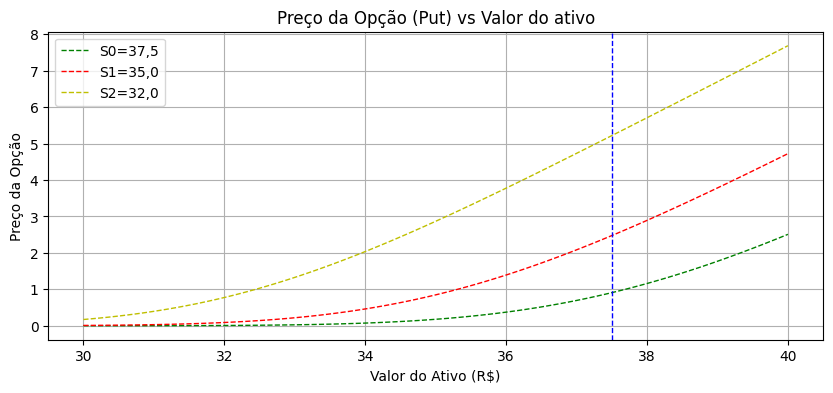

In [ ]:
# Plot do gráfico
plt.figure(figsize=(10, 4))
plt.plot(S, prices, label='S0=37,5', color='g', linestyle='dashed',linewidth=1)
plt.plot(S, prices1, label='S1=35,0', color='r', linestyle='dashed',linewidth=1)
plt.plot(S, prices2, label='S2=32,0', color='y', linestyle='dashed',linewidth=1)
plt.axvline(x=Kp,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.xlabel('Valor do Ativo (R$)')
plt.ylabel('Preço da Opção')
plt.title(f'Preço da Opção ({option_type.capitalize()}) vs Valor do ativo')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
P32S0 = black_scholes_option(Kp, 32, T, r, sigma, option_type)
P32S1 = black_scholes_option(S1, 32, T, r, sigma, option_type)
P32S2 = black_scholes_option(S2, 32, T, r, sigma, option_type)
print(P32S0, P32S1, P32S2)
print(P32S0-P32S1)
print(P32S0-P32S2)

0.007346241101346462 0.08891968960685226 0.7745701672928469
-0.0815734485055058
-0.7672239261915004
